In [22]:
%pip install wget
import wget
import pandas as pd

df = pd.read_csv("C:/Users/ASUS/Desktop/New folder/fer2023/fer2013.csv")


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [23]:
# Kiểm tra thông tin chung về DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


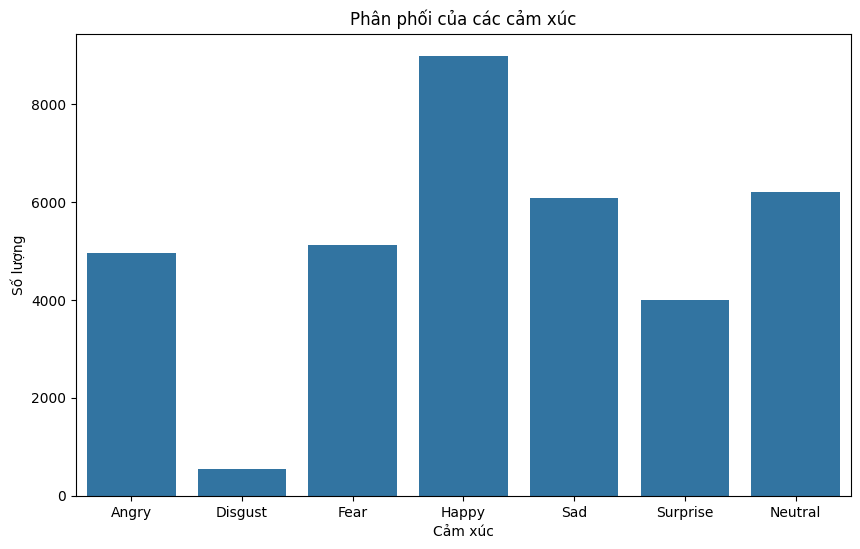

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Định nghĩa tên cho các loại cảm xúc
emotion_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Biểu đồ cột cho phân phối của cột 'emotion' với tên của các cảm xúc
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion')
plt.title('Phân phối của các cảm xúc')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')
plt.xticks(ticks=range(7), labels=emotion_names)  # Đặt tên cho các nhãn trên trục x
plt.show()



In [40]:
import pandas as pd
from sklearn.utils import resample

def adjust_emotion_sample(df, emotion_list, n_samples):
    df_balanced = df.copy()  # Sao chép dataframe gốc để tránh thay đổi trực tiếp

    for emotion in emotion_list:
        # Tách các mẫu của cảm xúc hiện tại
        emotion_samples = df_balanced[df_balanced['emotion'] == emotion]

        # Tách các mẫu không phải của cảm xúc hiện tại
        non_emotion_samples = df_balanced[df_balanced['emotion'] != emotion]

        # In số lượng mẫu của cảm xúc hiện tại trước khi tăng cường
        print(f"\nSố lượng mẫu của cảm xúc '{emotion}' trước khi tăng cường: {len(emotion_samples)}")

        # Tăng cường các mẫu của cảm xúc hiện tại để đạt đến số lượng mong muốn
        emotion_samples_augmented = resample(emotion_samples,
                                             replace=True,    # lấy mẫu với thay thế
                                             n_samples=n_samples,  # để đạt đến số lượng mong muốn
                                             random_state=42) # để có thể tái lập

        # Kết hợp các mẫu đã tăng cường với phần còn lại của tập dữ liệu
        df_balanced = pd.concat([non_emotion_samples, emotion_samples_augmented])

    # Xáo trộn tập dữ liệu
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    # Lưu DataFrame đã cân bằng vào một tệp CSV mới
    df_balanced.to_csv("C:/Users/ASUS/Desktop/New folder/fer2023/fer2013_balanced.csv", index=False)


In [41]:
# Gọi hàm adjust_emotion_sample để cân bằng số lượng mẫu
df_balanced = adjust_emotion_sample(df, [1, 3, 5], 6000)



Số lượng mẫu của cảm xúc '1' trước khi tăng cường: 547

Số lượng mẫu của cảm xúc '3' trước khi tăng cường: 8989

Số lượng mẫu của cảm xúc '5' trước khi tăng cường: 4002


In [45]:
import numpy as np
import pandas as pd
import cv2

# Hàm để thêm nhiễu Gaussian
def add_gaussian_noise(image):
    noise = np.random.normal(0, 20, image.shape).astype('uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Hàm để xoay ngẫu nhiên hình ảnh
def random_rotation(image):
    angle = np.random.uniform(-10, 10)
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_image

# Hàm để lật ngang hình ảnh
def horizontal_flip(image):
    flipped_image = cv2.flip(image, 1)
    return flipped_image

# Hàm để chuyển đổi pixels thành mảng hình ảnh
def pixels_to_image(pixels):
    image = np.fromstring(pixels, dtype=int, sep=' ').reshape(48, 48)
    image = image.astype(np.uint8)
    return image

# Hàm để chuyển đổi mảng hình ảnh thành pixels
def image_to_pixels(image):
    pixels = ' '.join(map(str, image.flatten()))
    return pixels

# Nạp tập dữ liệu
df = pd.read_csv("C:/Users/ASUS/Desktop/New folder/fer2023/fer2013_balanced.csv")

# Áp dụng các tăng cường và lưu lại vào DataFrame
augmented_data = []
for index, row in df.iterrows():
    original_image = pixels_to_image(row['pixels'])

    # Áp dụng từng tăng cường riêng biệt để tạo ba hình ảnh tăng cường khác nhau
    noisy_image = add_gaussian_noise(original_image)
    rotated_image = random_rotation(original_image)
    flipped_image = horizontal_flip(original_image)

    # Chuyển đổi hình ảnh tăng cường trở lại thành pixels và lưu vào DataFrame
    noisy_pixels = image_to_pixels(noisy_image)
    rotated_pixels = image_to_pixels(rotated_image)
    flipped_pixels = image_to_pixels(flipped_image)

    # Thêm hình ảnh gốc và hình ảnh đã tăng cường vào danh sách
    augmented_data.append([row['emotion'], row['pixels'], row['Usage']])
    augmented_data.append([row['emotion'], noisy_pixels, row['Usage']])
    augmented_data.append([row['emotion'], rotated_pixels, row['Usage']])
    augmented_data.append([row['emotion'], flipped_pixels, row['Usage']])

# Tạo DataFrame mới với dữ liệu đã tăng cường
augmented_df = pd.DataFrame(augmented_data, columns=['emotion', 'pixels', 'Usage'])

# Lưu DataFrame đã tăng cường vào một tệp CSV mới
augmented_df.to_csv("C:/Users/ASUS/Desktop/New folder/fer2023/fer2013_augmented.csv", index=False)


In [48]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_data(data_path):
    data = pd.read_csv(data_path)
    images = []
    labels = []
    for index, row in data.iterrows():
        # Sử dụng pandas để chuyển đổi chuỗi pixels thành mảng numpy float32
        pixels = np.array(row['pixels'].split(), dtype=np.float32)
        image = pixels.reshape((48, 48))
        images.append(image)
        labels.append(row['emotion'])
    images = np.array(images, dtype=np.float32)  # Chuyển đổi thành float32
    labels = np.array(labels)
    return images, labels

data_path = "C:/Users/ASUS/Desktop/New folder/fer2023/fer2013_augmented.csv"

images, labels = load_data(data_path)
images = images.reshape(-1, 48, 48, 1).astype('float32') / 255.0


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

y_train_one_hot = to_categorical(y_train, num_classes=7)  # FER-2013 có 7 loại cảm xúc
y_test_onehot = to_categorical(y_test, num_classes=7)

In [49]:
print(augmented_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161396 entries, 0 to 161395
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emotion  161396 non-null  int64 
 1   pixels   161396 non-null  object
 2   Usage    161396 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB
None


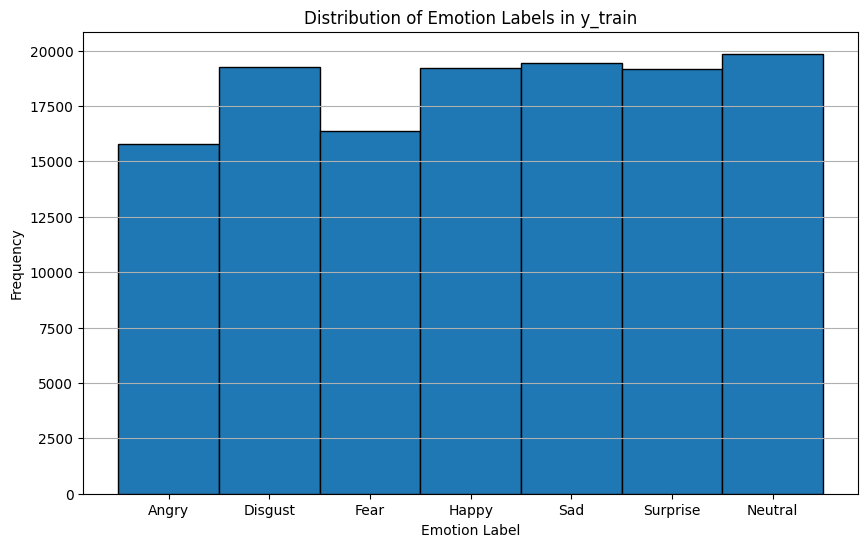

In [50]:
import matplotlib.pyplot as plt

# Định nghĩa tên cho các loại cảm xúc
emotion_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=range(8), edgecolor='black', align='left')
plt.xlabel('Emotion Label')
plt.ylabel('Frequency')
plt.title('Distribution of Emotion Labels in y_train')
plt.xticks(ticks=range(7), labels=emotion_names)  # Đặt tên cho các nhãn trên trục x
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.show()


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import load_model

# # Xây dựng mô hình
# model = Sequential([
#     Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.25),

#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Conv2D(256, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),
#     Dropout(0.25),

#     Conv2D(512, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D((2, 2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.25),
#     Dense(64, activation='relu'),
#     Dense(7, activation='softmax')
# ])

# # Biên dịch mô hình
# optimizer = Adam(learning_rate=0.001)  # Giảm learning rate để mô hình hội tụ chậm và ổn định hơn
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# # Sử dụng ReduceLROnPlateau callback để giảm learning rate nếu mất kiên nhẫn trong quá trình huấn luyện
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

# # Huấn luyện mô hình
# history = model.fit(x_train, y_train_one_hot, epochs=50, batch_size=64, validation_split=0.2)

# # Đánh giá mô hình
# test_loss, test_acc = model.evaluate(x_test, y_test_onehot)
# print(f'Test accuracy: {test_acc}')

# # Lưu mô hình
# model.save('improved_emotion_recognition_model.h5')

model = load_model("C:/Users/ASUS/Desktop/New folder/improved_emotion_recognition_model.h5")

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


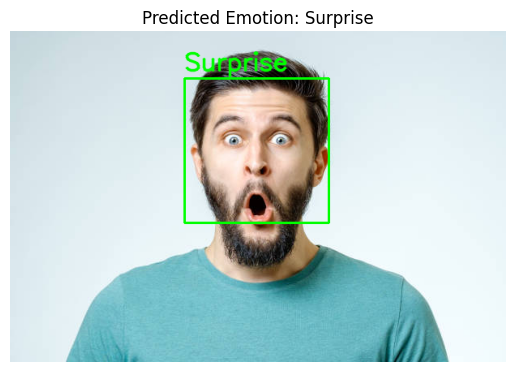

Predicted emotion: Surprise


In [54]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Tải mô hình đã lưu
model = tf.keras.models.load_model("C:/Users/ASUS/Desktop/New folder/improved_emotion_recognition_model.h5")

def detect_and_crop_face(image_path):
    # Tải Haar Cascade cho nhận diện khuôn mặt
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Đọc ảnh
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Không thể đọc ảnh từ đường dẫn cung cấp.")

    # Chuyển đổi ảnh sang màu xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Phát hiện các khuôn mặt trong ảnh
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Kiểm tra xem có phát hiện được khuôn mặt nào không
    if len(faces) == 0:
        raise ValueError("Không tìm thấy khuôn mặt nào trong ảnh.")

    # Lấy khuôn mặt đầu tiên (nếu có nhiều khuôn mặt thì lấy khuôn mặt đầu tiên)
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        break

    return face, (x, y, w, h), image

def predict_emotion(image_path, model):
    # Phát hiện và cắt khuôn mặt từ ảnh
    face, (x, y, w, h), original_image = detect_and_crop_face(image_path)

    # Thay đổi kích thước ảnh khuôn mặt về 48x48
    face_resized = cv2.resize(face, (48, 48))

    # Chuẩn bị ảnh cho dự đoán
    face_normalized = face_resized.reshape(1, 48, 48, 1).astype('float32') / 255.0

    # Dự đoán cảm xúc
    prediction = model.predict(face_normalized)

    # Gán nhãn cho các cảm xúc
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

    # Lấy nhãn cảm xúc dự đoán
    predicted_emotion = emotion_labels[np.argmax(prediction)]

    # Thêm nhãn cảm xúc vào ảnh gốc
    cv2.putText(original_image, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Hiển thị ảnh gốc với nhãn cảm xúc dự đoán
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    plt.show()

    # Trả về cảm xúc dự đoán
    return predicted_emotion

# Đường dẫn tới ảnh cần dự đoán
image_path = "C:/Users/ASUS/Desktop/New folder/batngo.jpg"  # Thay thế bằng đường dẫn tới ảnh của bạn

# Dự đoán cảm xúc
predicted_emotion = predict_emotion(image_path, model)
print(f'Predicted emotion: {predicted_emotion}')


In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
import tensorflow as tf

# Tải mô hình mà không bao gồm thông tin về trình tối ưu hóa
model = tf.keras.models.load_model('improved_emotion_recognition_model.h5', compile=False)


def detect_and_crop_face(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Không thể đọc ảnh từ đường dẫn cung cấp.")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        raise ValueError("Không tìm thấy khuôn mặt nào trong ảnh.")
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        break
    return face, (x, y, w, h), image

def predict_emotion(image_path, model):
    face, (x, y, w, h), original_image = detect_and_crop_face(image_path)
    face_resized = cv2.resize(face, (48, 48))
    face_normalized = face_resized.reshape(1, 48, 48, 1).astype('float32') / 255.0
    prediction = model.predict(face_normalized)
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = emotion_labels[np.argmax(prediction)]
    cv2.putText(original_image, predicted_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    #plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    #plt.title(f'Predicted Emotion: {predicted_emotion}')
    #plt.axis('off')
    #plt.show()
    return predicted_emotion

def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            img = Image.open(file_path)
            img = img.resize((200, 200))
            img = ImageTk.PhotoImage(img)
            panel.configure(image=img)
            panel.image = img
            emotion = predict_emotion(file_path, model)
            label.config(text=f'Cảm xúc: {emotion}')
        except Exception as e:
            label.config(text=f'Lỗi: {str(e)}')

def capture_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        label.config(text="Không thể mở webcam")
        return
    ret, frame = cap.read()
    if ret:
        cv2.imwrite('captured_image.jpg', frame)
        img = Image.open('captured_image.jpg')
        img = img.resize((200, 200))
        img = ImageTk.PhotoImage(img)
        panel.configure(image=img)
        panel.image = img
        emotion = predict_emotion('captured_image.jpg', model)
        label.config(text=f'Cảm xúc: {emotion}')
    cap.release()

def capture_and_predict_emotion():
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        label.config(text="Không thể mở webcam")
        return
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        for (x, y, w, h) in faces:
            face_gray = gray[y:y+h, x:x+w]
            face_resized = cv2.resize(face_gray, (48, 48))
            face_normalized = face_resized.reshape(1, 48, 48, 1).astype('float32') / 255.0
            prediction = model.predict(face_normalized)
            emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
            emotion = emotion_labels[np.argmax(prediction)]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.imshow('Nhận diện cảm xúc', frame)
        if cv2.waitKey(1) == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

root = tk.Tk()
root.title("Nhận diện cảm xúc")
root.geometry("600x400")
root.resizable(False, False)

upload_btn = tk.Button(root, text="Tải ảnh lên", command=upload_image, bg='light green', fg='black', activebackground='blue', activeforeground='white', width=20)
upload_btn.pack(pady=10)
capture_btn = tk.Button(root, text="Chụp ảnh", command=capture_image, bg='light yellow', fg='black', activebackground='blue', activeforeground='white', width=20)
capture_btn.pack(pady=10)
emotion_btn = tk.Button(root, text="Camera", command=capture_and_predict_emotion, bg='light blue', fg='dark blue', activebackground='blue', activeforeground='white', width=20)
emotion_btn.pack(pady=10)
panel = tk.Label(root)
panel.pack(pady=10)
label = tk.Label(root, text="Cảm xúc: ")
label.pack(pady=10)

root.mainloop()


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
